In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import colorcet as cc

In [2]:
from ipywidgets import interact
from bokeh.models import MultiSelect
from math import ceil
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, Slider, TextInput
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [4]:
!wget -O data/confirmed.csv $url_confirmed
!wget -O data/deaths.csv $url_death

--2020-10-09 20:47:05--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.12.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.12.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292518 (286K) [text/plain]
Saving to: ‘data/confirmed.csv’

data/confirmed.csv  100%[===================>] 285,66K  --.-KB/s    in 0,08s   

2020-10-09 20:47:05 (3,46 MB/s) - ‘data/confirmed.csv’ saved [292518/292518]

--2020-10-09 20:47:05--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.12.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.12.133|:443... connected.
HTTP requ

In [16]:
df = pd.read_csv(url_confirmed)

In [17]:
case_columns=df.columns[4:]

In [10]:
df = df.groupby(["Country/Region"])[case_columns].agg(sum)

In [18]:
i = df.groupby(["Country/Region"])[case_columns].max().index

In [29]:
df[df['Country/Region']=='China']['10/8/20']

AttributeError: 'numpy.int64' object has no attribute 'index'

In [32]:
idx = df.groupby(['Country/Region'])['10/8/20'].transform(max) == df['10/8/20']

In [36]:
df[idx][['Country/Region','Lat','Long']]

Country/Region        Lat       Long
0           Afghanistan  33.939110  67.709953
1               Albania  41.153300  20.168300
2               Algeria  28.033900   1.659600
3               Andorra  42.506300   1.521800
4                Angola -11.202700  17.873900
..                  ...        ...        ...
261  West Bank and Gaza  31.952200  35.233200
262      Western Sahara  24.215500 -12.885800
263               Yemen  15.552727  48.516388
264              Zambia -13.133897  27.849332
265            Zimbabwe -19.015438  29.154857

[188 rows x 3 columns]

In [10]:
df_population = pd.read_csv('data/population.csv',index_col=0)
df = df.merge(df_population, left_index=True,right_index=True)

In [13]:
df_total = df
df_total["total"] = df_total[case_columns[-1]]

In [18]:
countries = [x.lower() for x in df_total['Country/Region']]

In [19]:
for c in countries:
    print(f"{c},", end=None)

afghanistan,
albania,
algeria,
andorra,
angola,
antigua and barbuda,
argentina,
armenia,
australia,
austria,
azerbaijan,
bahamas,
bahrain,
bangladesh,
barbados,
belarus,
belgium,
belize,
benin,
bhutan,
bolivia,
bosnia and herzegovina,
botswana,
brazil,
brunei,
bulgaria,
burkina faso,
burma,
burundi,
cabo verde,
cambodia,
cameroon,
canada,
central african republic,
chad,
chile,
china,
colombia,
comoros,
congo (brazzaville),
congo (kinshasa),
costa rica,
cote d'ivoire,
croatia,
cuba,
cyprus,
czechia,
denmark,
diamond princess,
djibouti,
dominica,
dominican republic,
ecuador,
egypt,
el salvador,
equatorial guinea,
eritrea,
estonia,
eswatini,
ethiopia,
fiji,
finland,
france,
gabon,
gambia,
georgia,
germany,
ghana,
greece,
grenada,
guatemala,
guinea,
guinea-bissau,
guyana,
haiti,
holy see,
honduras,
hungary,
iceland,
india,
indonesia,
iran,
iraq,
ireland,
israel,
italy,
jamaica,
japan,
jordan,
kazakhstan,
kenya,
korea, south,
kosovo,
kuwait,
kyrgyzstan,
laos,
latvia,
lebanon,
lesotho,
liber

In [168]:
df_new = df
df_new["7_day_average"] = df[case_columns].diff(axis=1).fillna(0)[case_columns[-8:-1]].mean(axis=1)

In [172]:
df_new["7_day_average"] / (df_new["Population"]/1e6)

Afghanistan             0.726346
Albania                50.785880
Algeria                 3.575790
Andorra               749.477777
Angola                  3.398737
                         ...    
West Bank and Gaza     88.670419
Western Sahara          0.000000
Yemen                   0.050128
Zambia                  3.531947
Zimbabwe                0.811294
Length: 188, dtype: float64

In [159]:
df_new

1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  \
Afghanistan               0        0       0       0     0.0     0.0     0.0   
Albania                   0        0       0       0     0.0     0.0     0.0   
Algeria                   0        0       0       0     0.0     0.0     0.0   
Andorra                   0        0       0       0     0.0     0.0     0.0   
Angola                    0        0       0       0     0.0     0.0     0.0   
...                     ...      ...     ...     ...     ...     ...     ...   
West Bank and Gaza        0        0       0       0     0.0     0.0     0.0   
Western Sahara            0        0       0       0     0.0     0.0     0.0   
Yemen                     0        0       0       0     0.0     0.0     0.0   
Zambia                    0        0       0       0     0.0     0.0     0.0   
Zimbabwe                  0        0       0       0     0.0     0.0     0.0   

                    2/6/20  2/7/20  2/8/20  ...  9/29/20  9/30/20  10/1/20  \
Afghanistan            0.0     0.0     0.0  ...     21.0     14.0     17.0   
Albania                0.0     0.0     0.0  ...    127.0    131.0    157.0   
Algeria                0.0     0.0     0.0  ...    155.0    162.0    160.0   
Andorra                0.0     0.0     0.0  ...      0.0     84.0      0.0   
Angola                 0.0     0.0     0.0  ...    108.0     67.0    142.0   
...                    ...     ...     ...  ...      ...      ...      ...   
West Bank and Gaza     0.0     0.0     0.0  ...    420.0    358.0    423.0   
Western Sahara         0.0     0.0     0.0  ...      0.0      0.0      0.0   
Yemen                  0.0     0.0     0.0  ...      0.0      3.0      5.0   
Zambia                 0.0     0.0     0.0  ...     55.0     44.0     43.0   
Zimbabwe               0.0     0.0     0.0  ...     21.0      1.0     12.0   

                    10/2/20  10/3/20  10/4/20  10/5/20  10/6/20  \
Afghanistan             5.0      7.0     44.0     81.0     64.0   
Albania               159.0    152.0    149.0    144.0    158.0   
Algeria               157.0    148.0    141.0    134.0    129.0   
Andorra                60.0      0.0      0.0    260.0      0.0   
Angola                 97.0    159.0     32.0    128.0    195.0   
...                     ...      ...      ...      ...      ...   
West Bank and Gaza    444.0    312.0    420.0    459.0    475.0   
Western Sahara          0.0      0.0      0.0      0.0      0.0   
Yemen                   1.0      1.0      0.0      0.0      6.0   
Zambia                 28.0    144.0     78.0     37.0     81.0   
Zimbabwe                8.0     27.0      3.0     10.0     17.0   

                        Country/Region  Population  
Afghanistan                Afghanistan    37172386  
Albania                        Albania     2866376  
Algeria                        Algeria    42228429  
Andorra                        Andorra       77006  
Angola                          Angola    30809762  
...                                ...         ...  
West Bank and Gaza  West Bank and Gaza     4569087  
Western Sahara          Western Sahara      595060  
Yemen                            Yemen    28498687  
Zambia                          Zambia    17351822  
Zimbabwe                      Zimbabwe    14439018  

[188 rows x 253 columns]

In [80]:
df_new["7_day_average"] = df[case_columns[-8:-1]].mean(axis=1)

Province/State      Country/Region        Lat       Long  1/22/20  \
0              NaN         Afghanistan  33.939110  67.709953      0.0   
1              NaN             Albania  41.153300  20.168300      0.0   
2              NaN             Algeria  28.033900   1.659600      0.0   
3              NaN             Andorra  42.506300   1.521800      0.0   
4              NaN              Angola -11.202700  17.873900      0.0   
..             ...                 ...        ...        ...      ...   
261            NaN  West Bank and Gaza  31.952200  35.233200      0.0   
262            NaN      Western Sahara  24.215500 -12.885800      0.0   
263            NaN               Yemen  15.552727  48.516388      0.0   
264            NaN              Zambia -13.133897  27.849332      0.0   
265            NaN            Zimbabwe -19.015438  29.154857      0.0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/29/20  9/30/20  \
0        0.0      0.0      0.0      0.0      0.0  ...     21.0     14.0   
1        0.0      0.0      0.0      0.0      0.0  ...    127.0    131.0   
2        0.0      0.0      0.0      0.0      0.0  ...    155.0    162.0   
3        0.0      0.0      0.0      0.0      0.0  ...      0.0     84.0   
4        0.0      0.0      0.0      0.0      0.0  ...    108.0     67.0   
..       ...      ...      ...      ...      ...  ...      ...      ...   
261      0.0      0.0      0.0      0.0      0.0  ...    420.0    358.0   
262      0.0      0.0      0.0      0.0      0.0  ...      0.0      0.0   
263      0.0      0.0      0.0      0.0      0.0  ...      0.0      3.0   
264      0.0      0.0      0.0      0.0      0.0  ...     55.0     44.0   
265      0.0      0.0      0.0      0.0      0.0  ...     21.0      1.0   

     10/1/20  10/2/20  10/3/20  10/4/20  10/5/20  10/6/20  total  \
0       17.0      5.0      7.0     44.0     81.0     64.0   64.0   
1      157.0    159.0    152.0    149.0    144.0    158.0  158.0   
2      160.0    157.0    148.0    141.0    134.0    129.0  129.0   
3        0.0     60.0      0.0      0.0    260.0      0.0    0.0   
4      142.0     97.0    159.0     32.0    128.0    195.0  195.0   
..       ...      ...      ...      ...      ...      ...    ...   
261    423.0    444.0    312.0    420.0    459.0    475.0  475.0   
262      0.0      0.0      0.0      0.0      0.0      0.0    0.0   
263      5.0      1.0      1.0      0.0      0.0      6.0    6.0   
264     43.0     28.0    144.0     78.0     37.0     81.0   81.0   
265     12.0      8.0     27.0      3.0     10.0     17.0   17.0   

     7_day_average  
0        27.000000  
1       145.571429  
2       151.000000  
3        57.714286  
4       104.714286  
..             ...  
261     405.142857  
262       0.000000  
263       1.428571  
264      61.285714  
265      11.714286  

[266 rows x 265 columns]

In [104]:
df_new.merge(df_population_, how="left")

Province/State      Country/Region        Lat       Long  1/22/20  \
0              NaN         Afghanistan  33.939110  67.709953      0.0   
1              NaN             Albania  41.153300  20.168300      0.0   
2              NaN             Algeria  28.033900   1.659600      0.0   
3              NaN             Andorra  42.506300   1.521800      0.0   
4              NaN              Angola -11.202700  17.873900      0.0   
..             ...                 ...        ...        ...      ...   
261            NaN  West Bank and Gaza  31.952200  35.233200      0.0   
262            NaN      Western Sahara  24.215500 -12.885800      0.0   
263            NaN               Yemen  15.552727  48.516388      0.0   
264            NaN              Zambia -13.133897  27.849332      0.0   
265            NaN            Zimbabwe -19.015438  29.154857      0.0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/1/20  10/2/20  \
0        0.0      0.0      0.0      0.0      0.0  ...     17.0      5.0   
1        0.0      0.0      0.0      0.0      0.0  ...    157.0    159.0   
2        0.0      0.0      0.0      0.0      0.0  ...    160.0    157.0   
3        0.0      0.0      0.0      0.0      0.0  ...      0.0     60.0   
4        0.0      0.0      0.0      0.0      0.0  ...    142.0     97.0   
..       ...      ...      ...      ...      ...  ...      ...      ...   
261      0.0      0.0      0.0      0.0      0.0  ...    423.0    444.0   
262      0.0      0.0      0.0      0.0      0.0  ...      0.0      0.0   
263      0.0      0.0      0.0      0.0      0.0  ...      5.0      1.0   
264      0.0      0.0      0.0      0.0      0.0  ...     43.0     28.0   
265      0.0      0.0      0.0      0.0      0.0  ...     12.0      8.0   

     10/3/20  10/4/20  10/5/20  10/6/20  total  7_day_average  \
0        7.0     44.0     81.0     64.0   64.0      27.000000   
1      152.0    149.0    144.0    158.0  158.0     145.571429   
2      148.0    141.0    134.0    129.0  129.0     151.000000   
3        0.0      0.0    260.0      0.0    0.0      57.714286   
4      159.0     32.0    128.0    195.0  195.0     104.714286   
..       ...      ...      ...      ...    ...            ...   
261    312.0    420.0    459.0    475.0  475.0     405.142857   
262      0.0      0.0      0.0      0.0    0.0       0.000000   
263      1.0      0.0      0.0      6.0    6.0       1.428571   
264    144.0     78.0     37.0     81.0   81.0      61.285714   
265     27.0      3.0     10.0     17.0   17.0      11.714286   

             Unnamed: 0  Population  
0           Afghanistan    37172386  
1               Albania     2866376  
2               Algeria    42228429  
3               Andorra       77006  
4                Angola    30809762  
..                  ...         ...  
261  West Bank and Gaza     4569087  
262      Western Sahara      595060  
263               Yemen    28498687  
264              Zambia    17351822  
265            Zimbabwe    14439018  

[266 rows x 267 columns]

In [33]:
df["new"] = df[df.columns[-1]]

In [34]:
df["cumulative"]=df[df.columns[4:]].sum(axis=1)

In [36]:
df.sort_values(by=["cumulative"],ascending=False)

Province/State  Country/Region        Lat        Long  \
242                        NaN              US  40.000000 -100.000000   
30                         NaN          Brazil -14.235000  -51.925300   
143                        NaN           India  20.593684   78.962880   
208                        NaN          Russia  61.524010  105.318756   
202                        NaN            Peru  -9.190000  -75.015200   
..                         ...             ...        ...         ...   
46       Northwest Territories          Canada  64.825500 -124.845700   
124  Saint Pierre and Miquelon          France  46.885200  -56.315900   
246                   Anguilla  United Kingdom  18.220600  -63.068600   
85                       Tibet           China  31.692700   88.092400   
41            Diamond Princess          Canada   0.000000    0.000000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/29/20  \
242        1        1        2        2        5        5  ...  7191637   
30         0        0        0        0        0        0  ...  4777522   
143        0        0        0        0        0        0  ...  6225763   
208        0        0        0        0        0        0  ...  1162428   
202        0        0        0        0        0        0  ...   808714   
..       ...      ...      ...      ...      ...      ...  ...      ...   
46         0        0        0        0        0        0  ...        5   
124        0        0        0        0        0        0  ...       16   
246        0        0        0        0        0        0  ...        3   
85         0        0        0        0        0        0  ...        1   
41         0        0        0        0        0        0  ...        0   

     9/30/20  10/1/20  10/2/20  10/3/20  10/4/20  10/5/20  10/6/20      new  \
242  7233042  7277791  7332297  7382341  7417845  7457402  7499341  7499341   
30   4810935  4847092  4847092  4906833  4915289  4927235  4969141  4969141   
143  6312584  6394068  6473544  6549373  6623815  6685082  6757131  6757131   
208  1170799  1179634  1188928  1198663  1209039  1219796  1231277  1231277   
202   811768   814829   818297   821564   821564   828169   829999   829999   
..       ...      ...      ...      ...      ...      ...      ...      ...   
46         5        5        5        5        5        5        5        5   
124       16       16       16       16       16       16       16       16   
246        3        3        3        3        3        3        3        3   
85         1        1        1        1        1        1        1        1   
41         0        0        0        0        0        0        0        0   

     cumulative  
242   659598712  
30    369178691  
143   328037942  
208   117985232  
202    65091883  
..          ...  
46          945  
124         743  
246         577  
85          252  
41           32  

[266 rows x 265 columns]

In [42]:
df[~pd.isna(df["Province/State"])]["Country/Region"].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'United Kingdom'], dtype=object)

In [109]:
df_collapsed = df.groupby(["Country/Region"])[case_columns].agg(sum)

In [ ]:
df_collapsed.merge(df_population, left_index=True,right_index=True)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Afghanistan             0.0      0.0      0.0      0.0      0.0      0.0   
Albania                 0.0      0.0      0.0      0.0      0.0      0.0   
Algeria                 0.0      0.0      0.0      0.0      0.0      0.0   
Andorra                 0.0      0.0      0.0      0.0      0.0      0.0   
Angola                  0.0      0.0      0.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza      0.0      0.0      0.0      0.0      0.0      0.0   
Western Sahara          0.0      0.0      0.0      0.0      0.0      0.0   
Yemen                   0.0      0.0      0.0      0.0      0.0      0.0   
Zambia                  0.0      0.0      0.0      0.0      0.0      0.0   
Zimbabwe                0.0      0.0      0.0      0.0      0.0      0.0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  9/29/20  9/30/20  \
Afghanistan             0.0      0.0      0.0      0.0  ...     21.0     14.0   
Albania                 0.0      0.0      0.0      0.0  ...    127.0    131.0   
Algeria                 0.0      0.0      0.0      0.0  ...    155.0    162.0   
Andorra                 0.0      0.0      0.0      0.0  ...      0.0     84.0   
Angola                  0.0      0.0      0.0      0.0  ...    108.0     67.0   
...                     ...      ...      ...      ...  ...      ...      ...   
West Bank and Gaza      0.0      0.0      0.0      0.0  ...    420.0    358.0   
Western Sahara          0.0      0.0      0.0      0.0  ...      0.0      0.0   
Yemen                   0.0      0.0      0.0      0.0  ...      0.0      3.0   
Zambia                  0.0      0.0      0.0      0.0  ...     55.0     44.0   
Zimbabwe                0.0      0.0      0.0      0.0  ...     21.0      1.0   

                    10/1/20  10/2/20  10/3/20  10/4/20  10/5/20  10/6/20  \
Afghanistan            17.0      5.0      7.0     44.0     81.0     64.0   
Albania               157.0    159.0    152.0    149.0    144.0    158.0   
Algeria               160.0    157.0    148.0    141.0    134.0    129.0   
Andorra                 0.0     60.0      0.0      0.0    260.0      0.0   
Angola                142.0     97.0    159.0     32.0    128.0    195.0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza    423.0    444.0    312.0    420.0    459.0    475.0   
Western Sahara          0.0      0.0      0.0      0.0      0.0      0.0   
Yemen                   5.0      1.0      1.0      0.0      0.0      6.0   
Zambia                 43.0     28.0    144.0     78.0     37.0     81.0   
Zimbabwe               12.0      8.0     27.0      3.0     10.0     17.0   

                        Country/Region  Population  
Afghanistan                Afghanistan    37172386  
Albania                        Albania     2866376  
Algeria                        Algeria    42228429  
Andorra                        Andorra       77006  
Angola                          Angola    30809762  
...                                ...         ...  
West Bank and Gaza  West Bank and Gaza     4569087  
Western Sahara          Western Sahara      595060  
Yemen                            Yemen    28498687  
Zambia                          Zambia    17351822  
Zimbabwe                      Zimbabwe    14439018  

[188 rows x 261 columns]

In [119]:
df_collapsed.index, df_population

(Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
        ...
        'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
        'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
       dtype='object', name='Country/Region', length=188),
 Index(['Italy', 'Portugal', 'World', 'Rwanda', 'Bulgaria',
        'Sub-Saharan Africa (excluding high income)', 'North Macedonia',
        'Kuwait', 'Small states', 'Guinea',
        ...
        'Kosovo', 'Bahamas', 'Finland', 'Cameroon', 'Mali', 'Diamond Princess',
        'Holy See', 'Taiwan*', 'Western Sahara', 'MS Zaandam'],
       dtype='object', length=268))

In [113]:
df_population_

Unnamed: 0    Country/Region  Population
0               Italy             Italy    60421760
1            Portugal          Portugal    10283822
2               World             World  7594270356
3              Rwanda            Rwanda    12301939
4            Bulgaria          Bulgaria     7025037
..                ...               ...         ...
263  Diamond Princess  Diamond Princess        3600
264          Holy See          Holy See         825
265           Taiwan*           Taiwan*    23780000
266    Western Sahara    Western Sahara      595060
267        MS Zaandam        MS Zaandam        1829

[268 rows x 3 columns]

In [22]:
df.sort_values(by=["cumulative",df.columns[-1]],ascending=False)

Province/State  Country/Region        Lat        Long  \
242                        NaN              US  40.000000 -100.000000   
30                         NaN          Brazil -14.235000  -51.925300   
143                        NaN           India  20.593684   78.962880   
208                        NaN          Russia  61.524010  105.318756   
202                        NaN            Peru  -9.190000  -75.015200   
..                         ...             ...        ...         ...   
46       Northwest Territories          Canada  64.825500 -124.845700   
124  Saint Pierre and Miquelon          France  46.885200  -56.315900   
246                   Anguilla  United Kingdom  18.220600  -63.068600   
85                       Tibet           China  31.692700   88.092400   
41            Diamond Princess          Canada   0.000000    0.000000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/28/20  \
242        1        1        2        2        5        5  ...  7149537   
30         0        0        0        0        0        0  ...  4745464   
143        0        0        0        0        0        0  ...  6145291   
208        0        0        0        0        0        0  ...  1154299   
202        0        0        0        0        0        0  ...   805302   
..       ...      ...      ...      ...      ...      ...  ...      ...   
46         0        0        0        0        0        0  ...        5   
124        0        0        0        0        0        0  ...       16   
246        0        0        0        0        0        0  ...        3   
85         0        0        0        0        0        0  ...        1   
41         0        0        0        0        0        0  ...        0   

     9/29/20  9/30/20  10/1/20  10/2/20  10/3/20  10/4/20  10/5/20  10/6/20  \
242  7191637  7233042  7277791  7332297  7382341  7417845  7457402  7499341   
30   4777522  4810935  4847092  4847092  4906833  4915289  4927235  4969141   
143  6225763  6312584  6394068  6473544  6549373  6623815  6685082  6757131   
208  1162428  1170799  1179634  1188928  1198663  1209039  1219796  1231277   
202   808714   811768   814829   818297   821564   821564   828169   829999   
..       ...      ...      ...      ...      ...      ...      ...      ...   
46         5        5        5        5        5        5        5        5   
124       16       16       16       16       16       16       16       16   
246        3        3        3        3        3        3        3        3   
85         1        1        1        1        1        1        1        1   
41         0        0        0        0        0        0        0        0   

     cumulative  
242   652099371  
30    364209550  
143   321280811  
208   116753955  
202    64261884  
..          ...  
46          940  
124         727  
246         574  
85          251  
41           32  

[266 rows x 264 columns]

In [28]:
df[df]

KeyError: "None of [Index(['Australian Capital Territory', 'New South Wales', 'Northern Territory',\n       'Queensland', 'South Australia', 'Tasmania', 'Victoria',\n       'Western Australia', 'Alberta', 'British Columbia', 'Diamond Princess',\n       'Grand Princess', 'Manitoba', 'New Brunswick',\n       'Newfoundland and Labrador', 'Northwest Territories', 'Nova Scotia',\n       'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon',\n       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',\n       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',\n       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi',\n       'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi',\n       'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet',\n       'Xinjiang', 'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',\n       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Martinique',\n       'Mayotte', 'New Caledonia', 'Reunion', 'Saint Barthelemy',\n       'Saint Pierre and Miquelon', 'St Martin', 'Aruba',\n       'Bonaire, Sint Eustatius and Saba', 'Curacao', 'Sint Maarten',\n       'Anguilla', 'Bermuda', 'British Virgin Islands', 'Cayman Islands',\n       'Channel Islands', 'Falkland Islands (Malvinas)', 'Gibraltar',\n       'Isle of Man', 'Montserrat', 'Turks and Caicos Islands'],\n      dtype='object')] are in the [columns]"

In [84]:
df[df['Country/Region']=='Germany'].sum(axis=0)

Province/State          0
Country/Region    Germany
Lat                    51
Long                    9
1/22/20                 0
                   ...   
5/5/20             167007
5/6/20             168162
5/7/20             169430
5/8/20             170588
5/9/20             171324
Length: 113, dtype: object

In [85]:
df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [86]:
df_sub = df[df['Country/Region']=='Germany']

In [87]:
absolute = df_sub[df.columns[4:]].sum(axis=0).to_frame(name='sum') 
new_cases = absolute.diff(axis=0).fillna(0)
new_cases_rolling = new_cases.rolling(window=7, axis=0).mean().fillna(0)

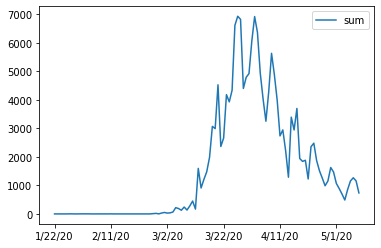

In [93]:
new_cases.plot()

In [125]:
def calc_trend(y : pd.Series, window_size: int):
    x = list(range(0, len(y)))
    z = np.polyfit(x[-window_size:], np.ravel(y.values[-window_size:]), 1)
    p = np.poly1d(z)
    res = np.empty(len(y))
    res[:] = np.nan
    res[-window_size:] = p(x[-window_size:])
    return res

In [121]:
z = np.polyfit(x[-14:], np.ravel(new_cases.values[-14:]), 1)
p = np.poly1d(z)

In [126]:
calc_trend(new_cases,7)

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           

In [124]:
p(x[-7:])

array([1044.53406593, 1017.74505495,  990.95604396,  964.16703297,
        937.37802198,  910.58901099,  883.8       ])

In [122]:
plt.plot(x[-7:],p(x[-7:]))
plt.plot(x,np.ravel(new_cases.values))

In [105]:
np.ravel(new_cases.values[-7:])

array([ 697.,  488.,  855., 1155., 1268., 1158.,  736.])

In [99]:
new_cases.values[-7:].ravel

<function ndarray.ravel>

In [89]:
df_sub[df.columns[4:]].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
5/5/20     167007
5/6/20     168162
5/7/20     169430
5/8/20     170588
5/9/20     171324
Length: 109, dtype: int64

In [123]:
absolute, new, new_rol =  get_lines('Germany')
x = list(range(0,len(new)))


In [76]:
source = ColumnDataSource(data=dict(x=x,absolute=absolute, new=new, new_rol=new_rol ))

In [77]:
source.data

{'x': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108],
 'absolute': array([     0,      0,      0,      0,      0,      1,      4,      4,
             4,      5,      8,     10,     12,     12,     12,     12,
            13,     13,     14,     14,     16,     16,     16,     16,
            16,     16,     16,     16,     16,     16,     16,     16,
            16,     16,     17,     27,  

In [78]:
p = figure(title="Newly Infected", plot_height=300, plot_width=600, y_range=(-100,100),
           background_fill_color='#efefef')
p.circle(-25, 25, radius=5, color=(0.1, 0.3, 0.61), alpha=0.8)


GlyphRenderer(id='1039', ...)

In [80]:
p = figure(title="Newly Infected", plot_height=300, plot_width=600, y_range=(-100,max(new)+100),
           background_fill_color='#efefef')
r = p.line('x', 'new', source=source, color="#8888cc", line_width=1.5, alpha=0.8)
r = p.line('x', 'new_rol',source=source, color="red", line_width=1.5, alpha=0.8)
#r = p.line('x', 'new_rol', color="red", line_width=1.5, alpha=0.8)
multi_select = MultiSelect(title="Option:", value=['Germany'],
                           options=countries)

NameError: name 'countries' is not defined

In [48]:
def update_data(attrname, old, new):
    country = multi_select.value
    absolute, new, new_rol  = get_lines(country)
    x = list(range(0,len(new)))
    source.data = dict(x=x,absolute=absolute, new=new, new_rol=new_rol )

In [49]:
multi_select.on_change('value',update_data )

In [8]:
show(multi_select,notebook_handle=True)
show(p, notebook_handle=True)

NameError: name 'multi_select' is not defined

In [52]:
source.data.keys()

dict_keys(['x', 'absolute', 'new', 'new_rol'])

In [40]:
df.columns[-1]

'4/20/20'

In [41]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/16/20             int64
4/17/20             int64
4/18/20             int64
4/19/20             int64
4/20/20             int64
Length: 94, dtype: object

In [168]:
from math import log10, log, ceil

In [91]:
df[df.columns[-1]].apply(lambda x: ceil(log(x)*5) if x>1 else 1).plot()

NameError: name 'ceil' is not defined

In [63]:
[len(df)*1]

[264]

In [65]:
np.ones(len(df))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [71]:
circle_source = ColumnDataSource(dict(x=df["Long"].values,
                                      y=df["Lat"].values,
                                      sizes=np.ones(len(df))
                                      )
                                 )

In [72]:
circle_source.data

{'x': array([  65.      ,   20.1683  ,    1.6596  ,    1.5218  ,   17.8739  ,
         -61.7964  ,  -63.6167  ,   45.0382  ,  149.0124  ,  151.2093  ,
         130.8456  ,  153.4     ,  138.6007  ,  145.9707  ,  144.9631  ,
         115.8605  ,   14.5501  ,   47.5769  ,  -77.3963  ,   50.55    ,
          90.3563  ,  -59.5432  ,   27.9534  ,    4.      ,    2.3158  ,
          90.4336  ,  -63.5887  ,   17.6791  ,  -51.9253  ,  114.7277  ,
          25.4858  ,   -1.5616  ,  -23.0418  ,  104.9167  ,   11.5021  ,
        -116.5765  , -123.1207  , -122.6655  ,  -98.8139  ,  -66.4619  ,
         -57.6604  ,  -63.7443  ,  -85.3232  ,  -63.4168  ,  -73.5491  ,
        -106.4509  ,   20.9394  ,   18.7322  ,  -71.543   ,  117.2264  ,
         116.4142  ,  107.874   ,  117.9874  ,  101.0583  ,  113.4244  ,
         108.7881  ,  106.8748  ,  109.7453  ,  116.1306  ,  127.7615  ,
         113.614   ,  114.2     ,  112.2707  ,  111.7088  ,  113.9448  ,
         119.455   ,  115.7221  ,  126.1923  ,

In [130]:
 from pyproj import CRS

inProj = CRS("WGS84")
outProj =CRS("EPSG:3857")
#outProj = pyproj.Proj(init="EPSG:3857")

In [129]:
outProj

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [119]:
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:3857")


In [122]:
transformer

<Conversion Transformer: pipeline>
Description: Popular Visualisation Pseudo-Mercator
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [121]:
transformer.transform(120,10)

(inf, inf)

In [103]:
inProj

Proj('+proj=longlat +datum=WGS84 +no_defs', preserve_units=True)

In [99]:
inProj = pyproj.Proj("epsg:4326")
outProj = pyproj.Proj("epsg:3857")

In [101]:
pyproj.transform(inProj,outProj,170,40)

(inf, inf)

In [11]:
l_test = ['Germany_confirmed_total_raw','Germany_confirmed_delta_raw', 'x']

In [12]:
[x for x in l_test if 'total' in x or 'x' in x]

['Germany_confirmed_total_raw', 'x']

In [11]:
from bokeh.plotting import ColumnDataSource, figure, output_file, show

output_file("toolbar.html")

source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A A_asd', 'b', 'C', 'd', 'E'],
))

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
]

p = figure(plot_width=400, plot_height=400, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)
show(p, notebook_handle=True)


In [173]:
# urls for hopkins data
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed = 'time_series_covid19_confirmed_global.csv'
deaths = 'time_series_covid19_deaths_global.csv'
recovered = 'time_series_covid19_recovered_global.csv'
case_columns = []

def load_data_frames():
    print("refresh")
    # load data directly from github to dataframes
    df_confirmed_ = pd.read_csv(f"{base_url}{confirmed}")
    df_deaths_ = pd.read_csv(f"{base_url}{deaths}")
    df_recovered_ = pd.read_csv(f"{base_url}{recovered}")
    df_population_ = pd.read_csv('data/population.csv')
    case_columns = df_confirmed_.columns[4:]
    df_confirmed_ = df_confirmed_.groupby(["Country/Region"])[case_columns].agg(sum)
    df_confirmed_ = df_confirmed_.merge(df_population_, left_index=True, right_index=True)
    daily = df_confirmed_[case_columns].diff(axis=1).fillna(0)[case_columns[-8:-1]]
    df_confirmed_["7_day_average_new"] = daily.mean(axis=1)
    df_confirmed_["7_day_average_new_per_capita"] = df_confirmed_["7_day_average_new"] /(df_confirmed_["Population"]/1e6)
    df_confirmed_["total"] = df_confirmed_[case_columns[-1]]
    df_confirmed_["total_per_capita"] =  df_confirmed_["total"] /(df_confirmed_["Population"]/1e6)
    return df_confirmed_, df_deaths_, df_recovered_, df_population_


df_confirmed, df_deaths, df_recovered, df_population = load_data_frames()

refresh


In [174]:
!python --version

Python 3.8.2


In [21]:
def test():
    return 1,2

In [23]:
test()[1]

2